In [24]:
import uproot
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

In [21]:
metricsList = [] #error, residual, rms, final
metricsNames = ["error", "residual", "root mean square", "overall"]
metricsList.append(pd.read_csv("metrics_err.csv", index_col=0))
metricsList.append(pd.read_csv("metrics_res.csv", index_col=0))
metricsList.append(pd.read_csv("metrics_rms.csv", index_col=0))
metricsList.append(pd.read_csv("metrics_final.csv", index_col=0))

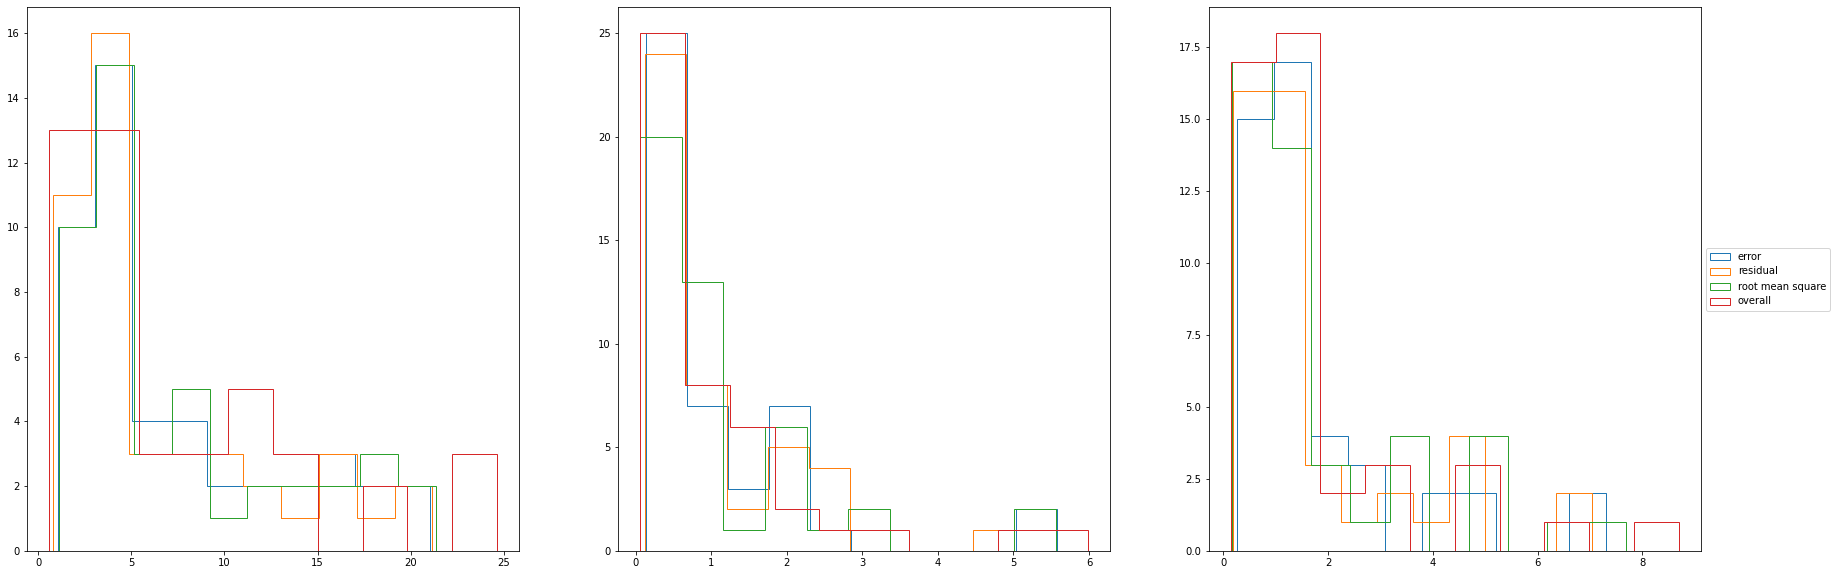

In [28]:
fig, ax = plt.subplots(1,3, figsize=(30,10));
for name,dataframe in zip(metricsNames, metricsList):
    ax[0].hist(dataframe["abs_err"], histtype='step', label=name);
    ax[1].hist(dataframe["max_res"], histtype='step', label=name);
    ax[2].hist(dataframe["rms_err"], histtype='step', label=name);
    ax[2].legend(bbox_to_anchor=[1, 0.5], loc='center left');

In [66]:
ylim_tops = np.zeros((4,3))
for matrix_row, dataframe in enumerate(metricsList):
    for n, (col_name, column) in enumerate(dataframe.iteritems()):
        ylim_tops[matrix_row, n] = max(column)
        
ylim_tops = np.max(ylim_tops, axis=0)

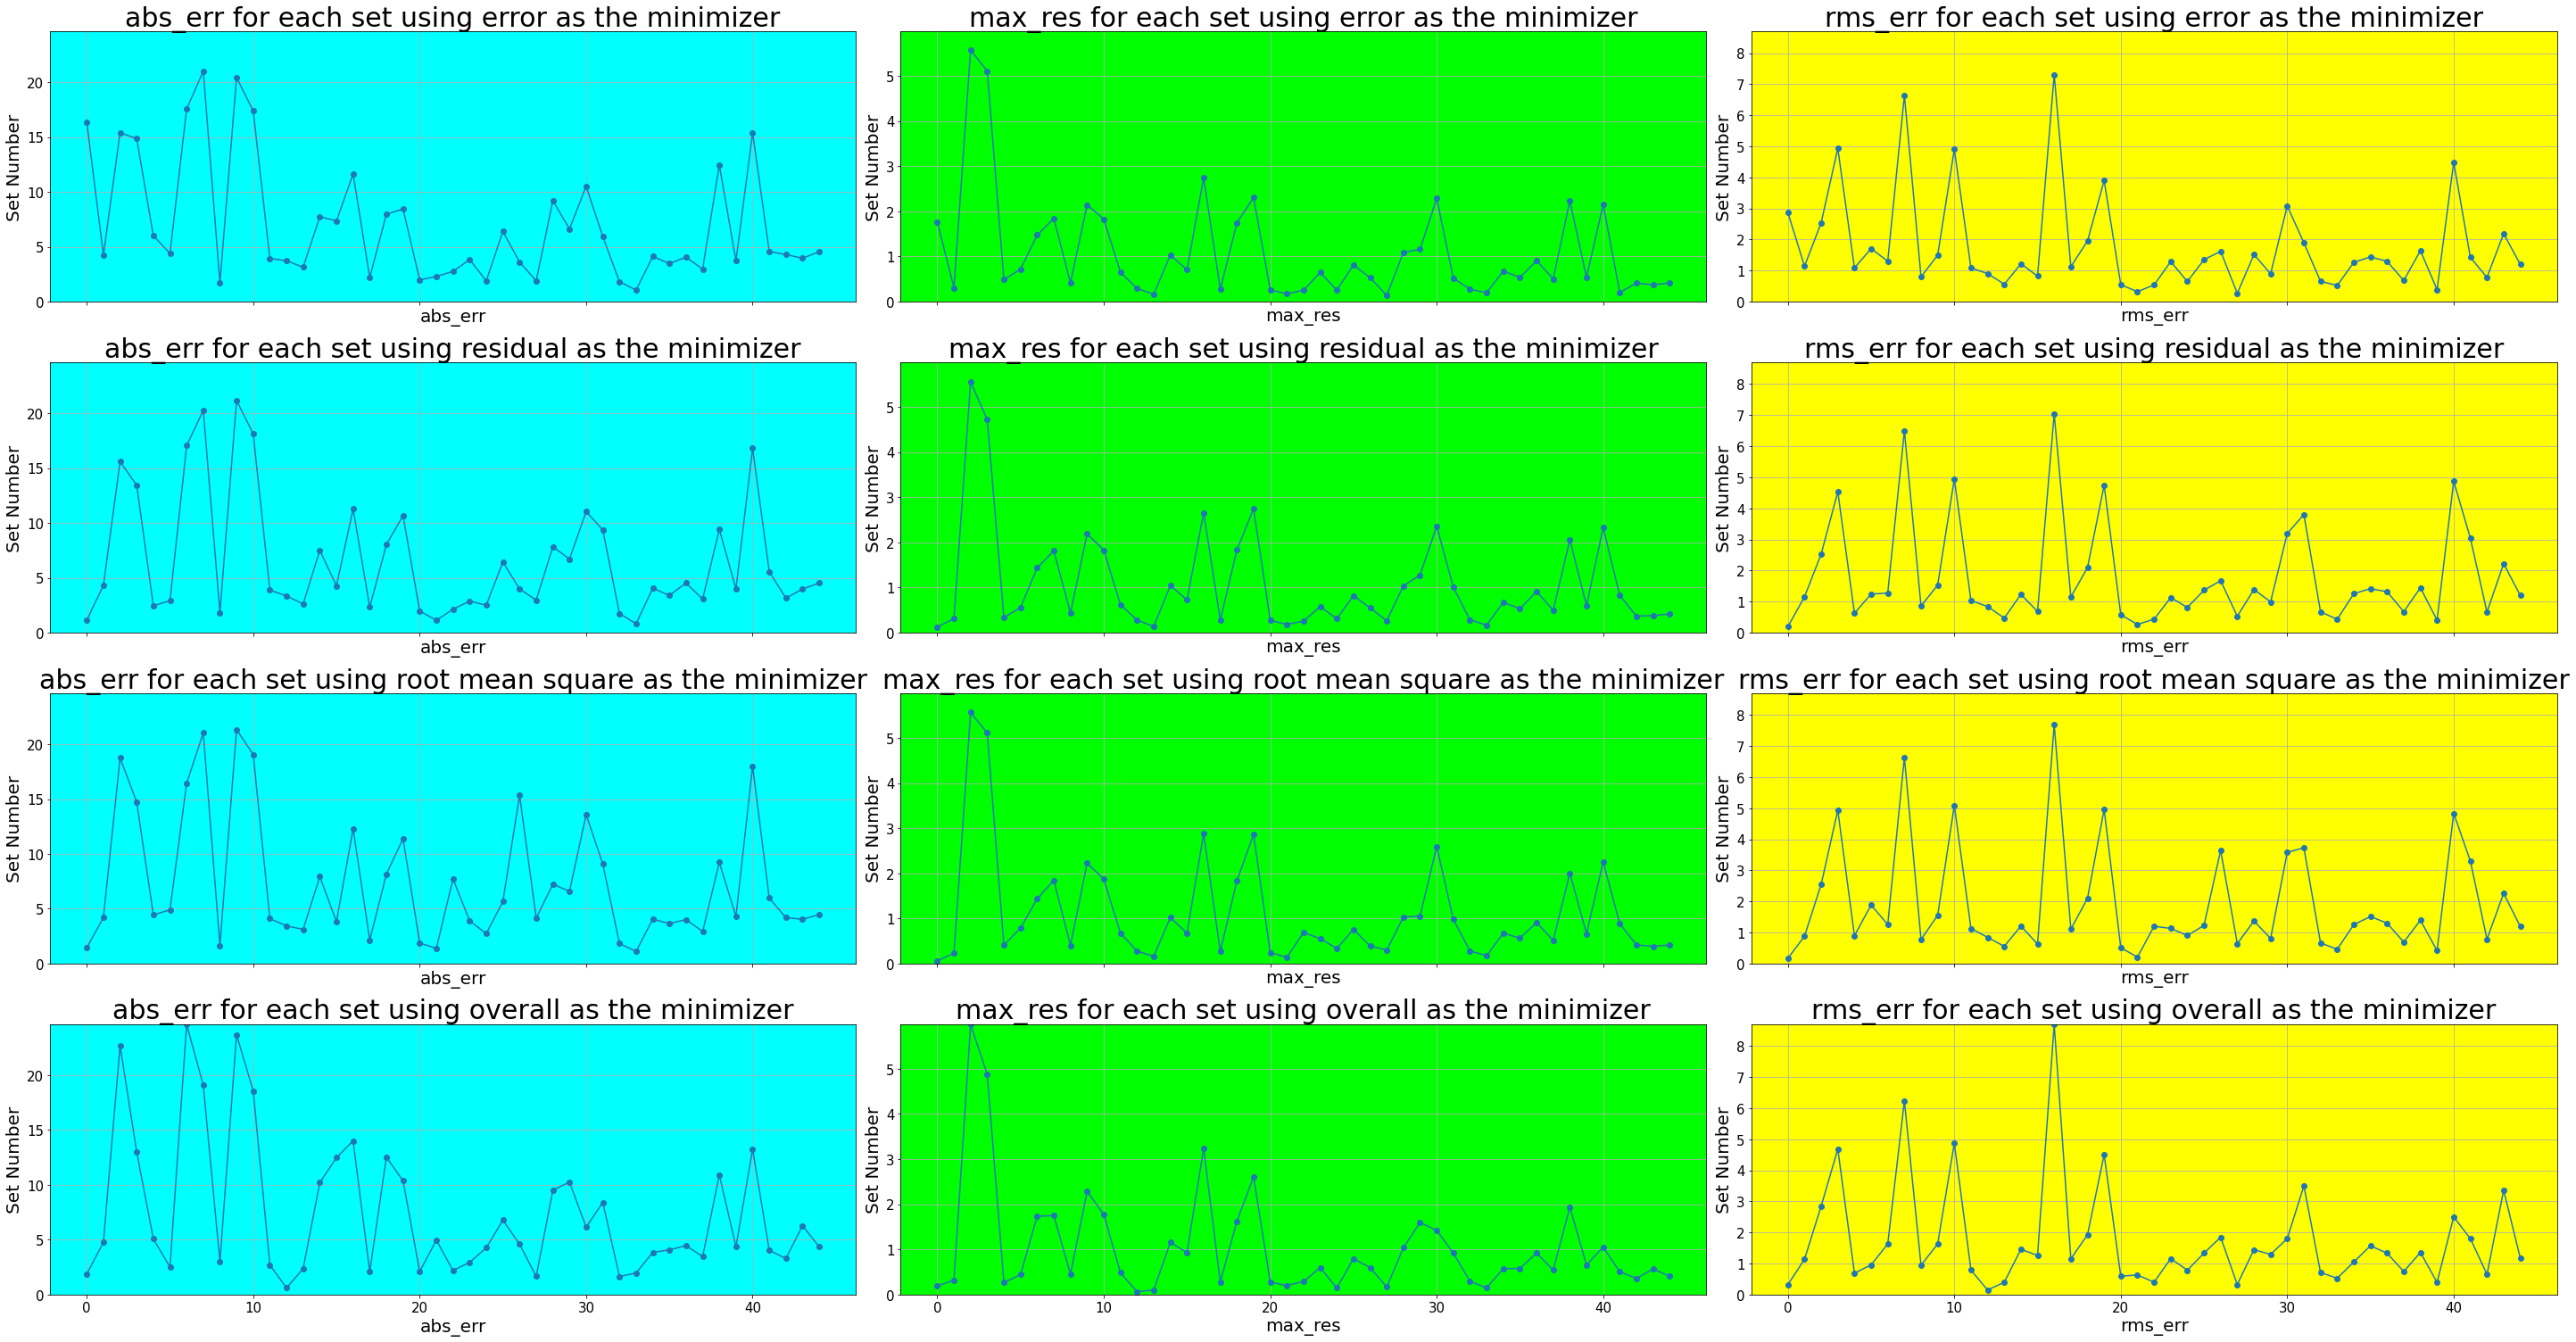

In [85]:
boundaryColors = ['cyan', 'lime', 'yellow', 'pink']
fig, ax = plt.subplots(4,3, figsize=(10*4,7*3), sharex=True);
row = 0
for name,dataframe in zip(metricsNames, metricsList):
    for n, (col_name, column) in enumerate(dataframe.iteritems()):
        ax[row][n].plot(column, label=name, marker='o');
        ax[row][n].set_ylim(top=ylim_tops[n], bottom=0);
        ax[row][n].set_facecolor(boundaryColors[n]);
        
        ax[row][n].set_title(col_name + " for each set using " + name + " as the minimizer", fontsize=30);
        ax[row][n].set_xlabel(col_name, fontsize=20);
        ax[row][n].set_ylabel("Set Number", fontsize=20);
        
        ax[row][n].tick_params(axis='both', which='major', labelsize=15);
        ax[row][n].tick_params(axis='both', which='minor', labelsize=10);
        ax[row][n].grid(visible=True, which='both', axis='both');
    
    row += 1
plt.tight_layout();

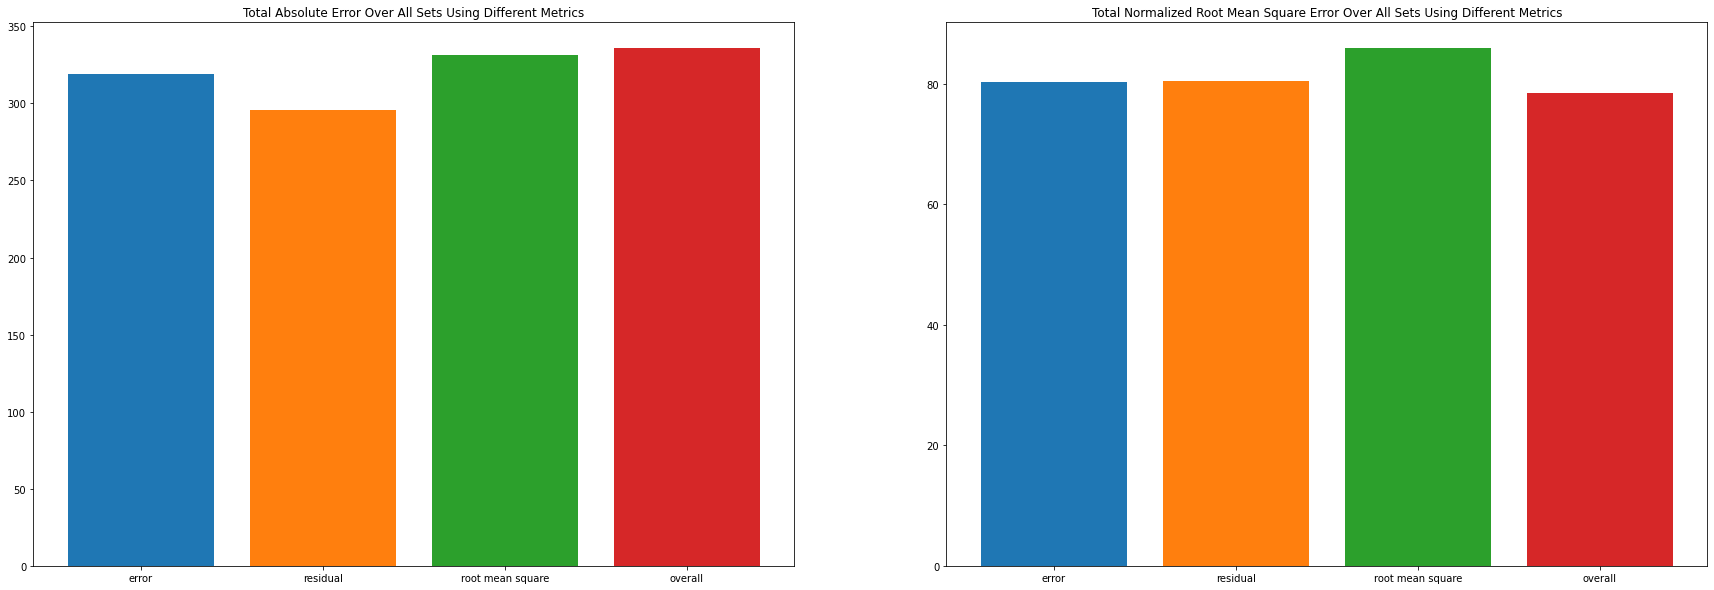

In [40]:
fig, ax = plt.subplots(1,2, figsize=(30,10));
for name,dataframe in zip(metricsNames, metricsList):
    ax[0].bar(name, np.sum(dataframe["abs_err"]), label=name);
    ax[0].set_title("Total Absolute Error Over All Sets Using Different Metrics");
    ax[1].bar(name, np.sum(dataframe["rms_err"]), label=name);
    ax[1].set_title("Total Normalized Root Mean Square Error Over All Sets Using Different Metrics");

In [ ]:
test_dict = {(100,50,1)}